C:\Users\jasmi\AppData\Local\Temp\ipykernel_4496\1108514690.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/jasmi/OneDrive/Documents/Desktop/Naan Mudalvan/Data_Gov_Tamil_Nadu.csv', encoding='latin1')


  CORPORATE_IDENTIFICATION_NUMBER  \
0                          F00643   
1                          F00721   
2                          F00892   
3                          F01208   
4                          F01218   

                                        COMPANY_NAME COMPANY_STATUS  \
0                                   HOCHTIEFF AG,              NAEF   
1  SUMITOMO CORPORATION (SUMITOMO SHOJI KAISHA LI...           ACTV   
2                      SRILANKAN AIRLINES LIMITED              ACTV   
3                            CALTEX INDIA LIMITED              NAEF   
4              GE HEALTHCARE BIO-SCIENCES LIMITED              ACTV   

  COMPANY_CLASS COMPANY_CATEGORY COMPANY_SUB_CATEGORY DATE_OF_REGISTRATION  \
0           NaN              NaN                  NaN           01-12-1961   
1           NaN              NaN                  NaN                  NaN   
2           NaN              NaN                  NaN           01-03-1982   
3           NaN              NaN      

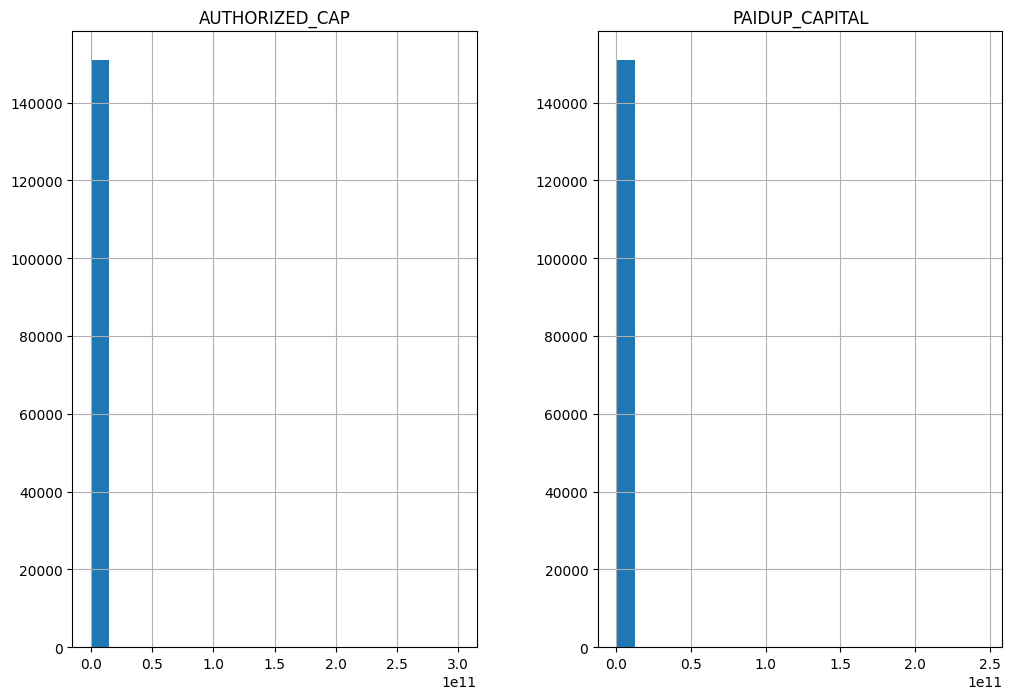

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data with a different encoding if needed
data = pd.read_csv('C:/Users/jasmi/OneDrive/Documents/Desktop/Naan Mudalvan/Data_Gov_Tamil_Nadu.csv', encoding='latin1')

# Display the first few rows of the dataset to get a quick overview
print(data.head())

# Basic statistics
summary_stats = data.describe()
print(summary_stats)

# Data distribution histograms for numerical attributes
numerical_attributes = data.select_dtypes(include=['int64', 'float64'])
numerical_attributes.hist(bins=20, figsize=(12, 8))
plt.show()

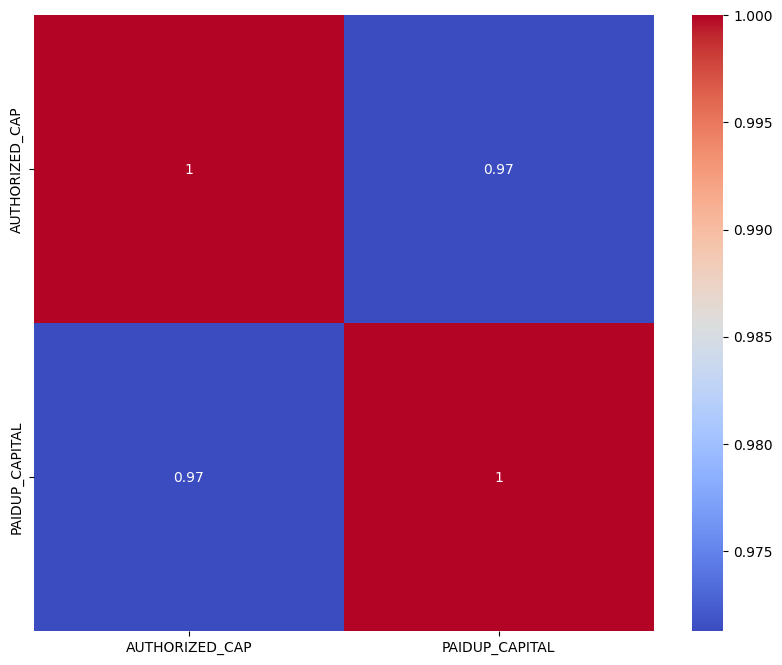

In [ ]:
# Correlation matrix for numerical attributes
correlation_matrix = numerical_attributes.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


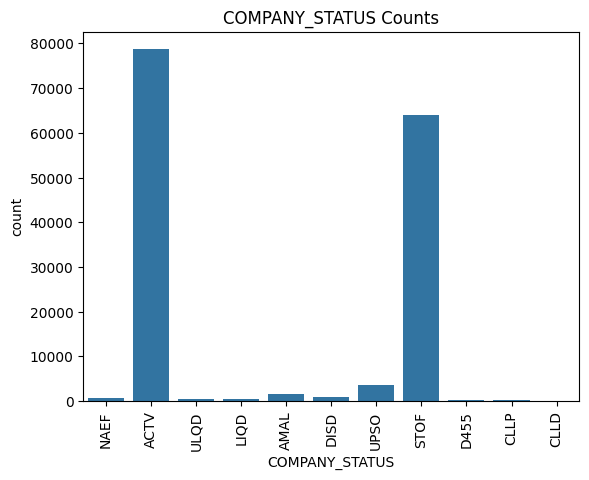

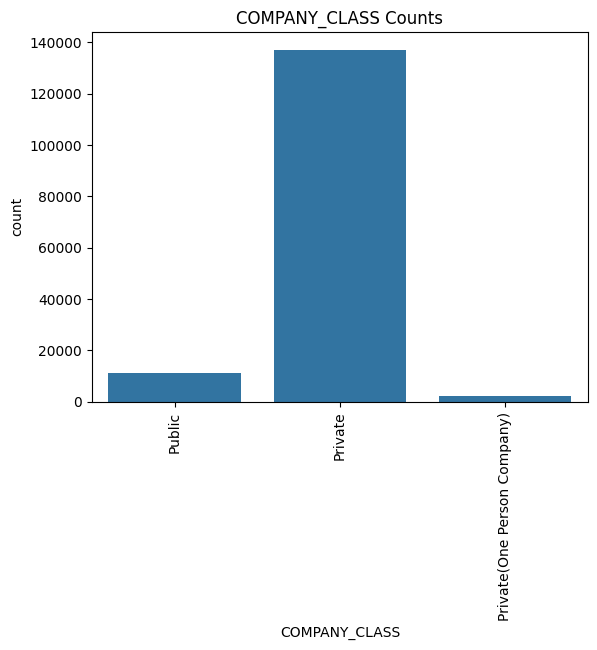

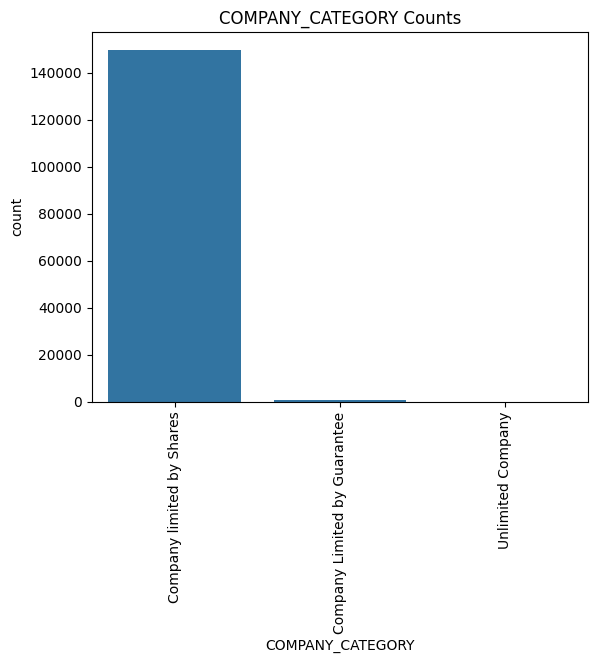

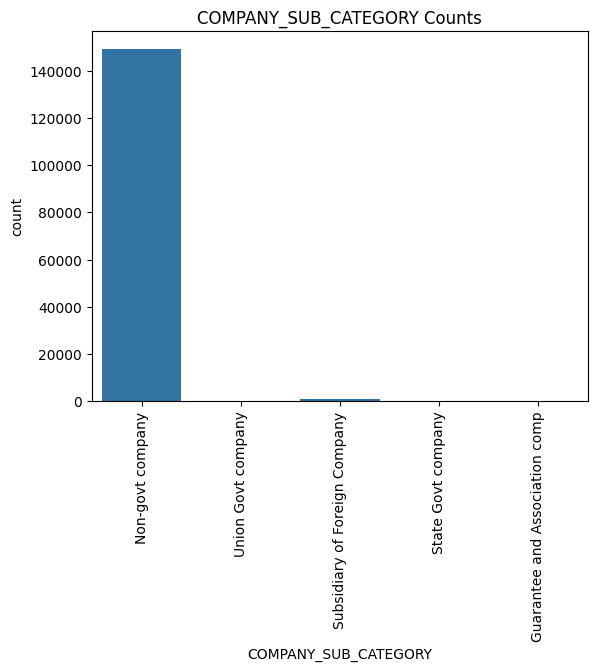

In [7]:

# Countplot for categorical variables
categorical_columns = ["COMPANY_STATUS", "COMPANY_CLASS", "COMPANY_CATEGORY", "COMPANY_SUB_CATEGORY"]
for column in categorical_columns:
    sns.countplot(x=column, data=data)
    plt.title(f"{column} Counts")
    plt.xticks(rotation=90)
    plt.show()



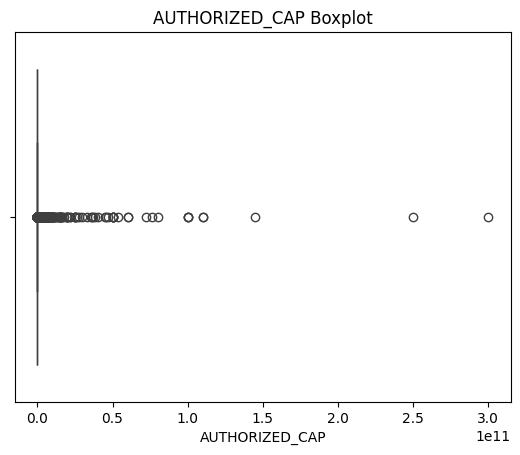

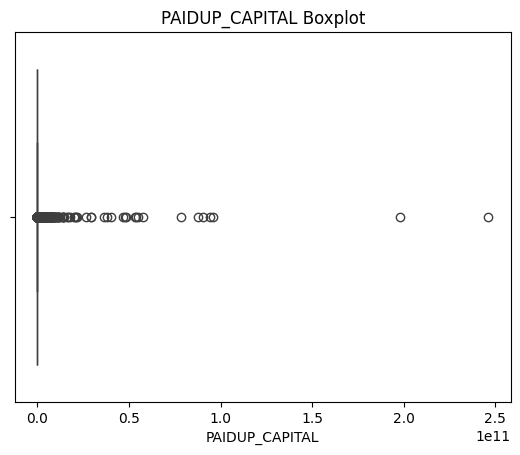

In [9]:
# Define numerical columns
numerical_columns = ["AUTHORIZED_CAP", "PAIDUP_CAPITAL"]

# Boxplot for numerical variables
for column in numerical_columns:
    sns.boxplot(x=column, data=data)
    plt.title(f"{column} Boxplot")
    plt.show()

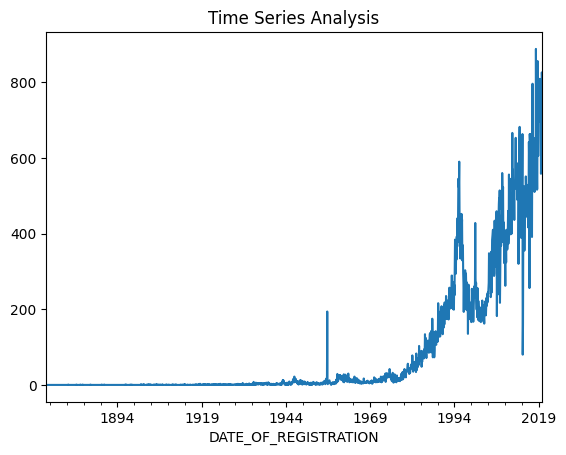

In [11]:
# Time series analysis (if DATE_OF_REGISTRATION is a time-based attribute)
if 'DATE_OF_REGISTRATION' in data:
    data['DATE_OF_REGISTRATION'] = pd.to_datetime(data['DATE_OF_REGISTRATION'], format='%d-%m-%Y')
    data.set_index('DATE_OF_REGISTRATION', inplace=True)
    time_series_plot = data.resample('M').size().plot()
    plt.title("Time Series Analysis")
    plt.show()


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)  # Display all columns

# Load the dataset
data = pd.read_csv('C:/Users/jasmi/OneDrive/Documents/Desktop/Naan Mudalvan/Data_Gov_Tamil_Nadu.csv', encoding='latin1')

# Define numerical and categorical columns
numerical_columns = ["AUTHORIZED_CAP", "PAIDUP_CAPITAL"]
categorical_columns = ["COMPANY_STATUS", "COMPANY_CLASS", "COMPANY_CATEGORY", "COMPANY_SUB_CATEGORY"]

# Scaling of numerical columns using StandardScaler
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Label encoding of categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# One-Hot Encoding for Categorical Variables
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Date Feature Engineering
data['DATE_OF_REGISTRATION'] = pd.to_datetime(data['DATE_OF_REGISTRATION'], format='%d-%m-%Y')
data['Year'] = data['DATE_OF_REGISTRATION'].dt.year
data['Month'] = data['DATE_OF_REGISTRATION'].dt.month
data['Day'] = data['DATE_OF_REGISTRATION'].dt.day
data['DayOfWeek'] = data['DATE_OF_REGISTRATION'].dt.dayofweek

# Interaction Feature
data['Authorized_Paidup_Ratio'] = data['AUTHORIZED_CAP'] / data['PAIDUP_CAPITAL']

# Feature Scaling for Specific Columns
min_max_scaler = MinMaxScaler()
data['AUTHORIZED_CAP'] = min_max_scaler.fit_transform(data['AUTHORIZED_CAP'].values.reshape(-1, 1))

# Feature Imputation 
imputer = SimpleImputer(strategy='mean')
data['PAIDUP_CAPITAL'] = imputer.fit_transform(data['PAIDUP_CAPITAL'].values.reshape(-1, 1))

# Display the updated dataset
print(data.head())


C:\Users\jasmi\AppData\Local\Temp\ipykernel_19820\1260449912.py:10: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/jasmi/OneDrive/Documents/Desktop/Naan Mudalvan/Data_Gov_Tamil_Nadu.csv', encoding='latin1')


  CORPORATE_IDENTIFICATION_NUMBER  \
0                          F00643   
1                          F00721   
2                          F00892   
3                          F01208   
4                          F01218   

                                        COMPANY_NAME DATE_OF_REGISTRATION  \
0                                   HOCHTIEFF AG,              1961-12-01   
1  SUMITOMO CORPORATION (SUMITOMO SHOJI KAISHA LI...                  NaT   
2                      SRILANKAN AIRLINES LIMITED              1982-03-01   
3                            CALTEX INDIA LIMITED                     NaT   
4              GE HEALTHCARE BIO-SCIENCES LIMITED                     NaT   

  REGISTERED_STATE  AUTHORIZED_CAP  PAIDUP_CAPITAL INDUSTRIAL_CLASS  \
0       Tamil Nadu             0.0       -0.021715              NaN   
1       Tamil Nadu             0.0       -0.021715              NaN   
2       Tamil Nadu             0.0       -0.021715              NaN   
3       Tamil Nadu            

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score
#  Loading and Cleaning Data
data = pd.read_csv('Data_Gov_Tamil_Nadu.csv', encoding='ISO-8859-1')

# Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Filling missing values
data['LATEST_YEAR_ANNUAL_RETURN'].interpolate(method='linear', inplace=True)
data['LATEST_YEAR_FINANCIAL_STATEMENT'].interpolate(method='linear', inplace=True)

#Converting Categorical Features to Numerical
display(data.describe())
label_encoder = LabelEncoder()
data['COMPANY_CLASS'] = label_encoder.fit_transform(data['COMPANY_CLASS'])
data['COMPANY_CATEGORY'] = label_encoder.fit_transform(data['COMPANY_CATEGORY'])
data['COMPANY_SUB_CATEGORY'] = label_encoder.fit_transform(data['COMPANY_SUB_CATEGORY'])
display(data.describe())

# Split data into training and testing sets
features = ['COMPANY_CLASS', 'AUTHORIZED_CAP', 'PAIDUP_CAPITAL', 'INDUSTRIAL_CLASS']
target = 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'

# Encode categorical features using Label Encoding
for feature in ['COMPANY_CLASS', 'INDUSTRIAL_CLASS']:
    data[feature] = data[feature].astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Multi-Class Classification Model (Random Forest Classifier)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

C:\Users\jasmi\AppData\Local\Temp\ipykernel_19820\3776657429.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data_Gov_Tamil_Nadu.csv', encoding='ISO-8859-1')


Missing Values:
 CORPORATE_IDENTIFICATION_NUMBER        0
COMPANY_NAME                           0
COMPANY_STATUS                         0
COMPANY_CLASS                        334
COMPANY_CATEGORY                     334
                                   ...  
REGISTERED_OFFICE_ADDRESS             90
REGISTRAR_OF_COMPANIES               174
EMAIL_ADDR                         38129
LATEST_YEAR_ANNUAL_RETURN          75889
LATEST_YEAR_FINANCIAL_STATEMENT    75782
Length: 17, dtype: int64


,AUTHORIZED_CAP,PAIDUP_CAPITAL
count,1.508710e+05,1.508710e+05
mean,3.522781e+07,2.328824e+07
std,1.408554e+09,1.072458e+09
min,0.000000e+00,0.000000e+00
25%,1.000000e+05,1.000000e+05
50%,8.000000e+05,1.000000e+05
75%,2.000000e+06,6.857450e+05
max,3.000000e+11,2.461235e+11


,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,AUTHORIZED_CAP,PAIDUP_CAPITAL
count,150871.000000,150871.000000,150871.000000,1.508710e+05,1.508710e+05
mean,0.169701,1.000563,1.023484,3.522781e+07,2.328824e+07
std,0.550590,0.113658,0.258196,1.408554e+09,1.072458e+09
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,1.000000,1.000000,1.000000e+05,1.000000e+05
50%,0.000000,1.000000,1.000000,8.000000e+05,1.000000e+05
75%,0.000000,1.000000,1.000000,2.000000e+06,6.857450e+05
max,3.000000,3.000000,5.000000,3.000000e+11,2.461235e+11


RandomForestClassifier(random_state=42)

In [15]:
#  Model Evaluation
# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted F1-score for multi-class
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Weighted F1-Score: {f1:.2f}')
print('Classification Report:')
print(classification_rep)

Accuracy: 1.00
Weighted F1-Score: 1.00
Classification Report:
                                                                                                                precision    recall  f1-score   support

Activities of private households as employers and undifferentiated production activities of private households       1.00      1.00      1.00         4
                                                                                          Agriculture & allied       1.00      1.00      1.00      1498
                                                                                                  Construction       1.00      1.00      1.00      1791
                                                                                                     Education       0.99      1.00      1.00       343
                                                                              Electricity gas and water supply       1.00      1.00      1.00       502
                         